In [ ]:
 import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import tensorflow as tf
import numpy as np
from sklearn import *
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor



from sklearn.linear_model import LinearRegression

In [ ]:
#downloading data
# global_vaccination_df = pd.read_csv('/content/vaccinations.csv')
global_vaccination_df = pd.read_csv('https://github.com/owid/covid-19-data/blob/master/public/data/vaccinations/vaccinations.csv?raw=true')
data = global_vaccination_df

In [ ]:
data

location iso_code        date  total_vaccinations  \
0      Afghanistan      AFG  2021-02-22                 0.0   
1      Afghanistan      AFG  2021-02-23                 NaN   
2      Afghanistan      AFG  2021-02-24                 NaN   
3      Afghanistan      AFG  2021-02-25                 NaN   
4      Afghanistan      AFG  2021-02-26                 NaN   
...            ...      ...         ...                 ...   
87816     Zimbabwe      ZWE  2022-03-06           7938362.0   
87817     Zimbabwe      ZWE  2022-03-07           7943325.0   
87818     Zimbabwe      ZWE  2022-03-08           7949875.0   
87819     Zimbabwe      ZWE  2022-03-09           7963423.0   
87820     Zimbabwe      ZWE  2022-03-10           7972666.0   

       people_vaccinated  people_fully_vaccinated  total_boosters  \
0                    0.0                      NaN             NaN   
1                    NaN                      NaN             NaN   
2                    NaN                      NaN             NaN   
3                    NaN                      NaN             NaN   
4                    NaN                      NaN             NaN   
...                  ...                      ...             ...   
87816          4378029.0                3410960.0        149373.0   
87817          4379875.0                3412556.0        150894.0   
87818          4381982.0                3414446.0        153447.0   
87819          4386789.0                3417692.0        158942.0   
87820          4390103.0                3421237.0        161326.0   

       daily_vaccinations_raw  daily_vaccinations  \
0                         NaN                 NaN   
1                         NaN              1367.0   
2                         NaN              1367.0   
3                         NaN              1367.0   
4                         NaN              1367.0   
...                       ...                 ...   
87816                  2217.0              8017.0   
87817                  4963.0              7482.0   
87818                  6550.0              6931.0   
87819                 13548.0              7526.0   
87820                  9243.0              7365.0   

       total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                                0.00                           0.00   
1                                 NaN                            NaN   
2                                 NaN                            NaN   
3                                 NaN                            NaN   
4                                 NaN                            NaN   
...                               ...                            ...   
87816                           52.60                          29.01   
87817                           52.63                          29.02   
87818                           52.68                          29.03   
87819                           52.77                          29.07   
87820                           52.83                          29.09   

       people_fully_vaccinated_per_hundred  total_boosters_per_hundred  \
0                                      NaN                         NaN   
1                                      NaN                         NaN   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                         NaN   
...                                    ...                         ...   
87816                                22.60                        0.99   
87817                                22.61                        1.00   
87818                                22.62                        1.02   
87819                                22.65                        1.05   
87820                                22.67                        1.07   

       daily_vaccinations_per_mil

In [ ]:
data.isnull().sum()

location                                   0
iso_code                                   0
date                                       0
total_vaccinations                     40576
people_vaccinated                      42808
people_fully_vaccinated                45535
total_boosters                         69251
daily_vaccinations_raw                 48491
daily_vaccinations                       298
total_vaccinations_per_hundred         40576
people_vaccinated_per_hundred          42808
people_fully_vaccinated_per_hundred    45535
total_boosters_per_hundred             69251
daily_vaccinations_per_million           298
daily_people_vaccinated                 1636
daily_people_vaccinated_per_hundred     1636
dtype: int64

In [ ]:
data.shape

(87821, 16)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
data['total_vaccination_per_day'] =  0
data.head()

location iso_code        date  total_vaccinations  people_vaccinated  \
0  Afghanistan      AFG  2021-02-22                 0.0                0.0   
1  Afghanistan      AFG  2021-02-23                 NaN                NaN   
2  Afghanistan      AFG  2021-02-24                 NaN                NaN   
3  Afghanistan      AFG  2021-02-25                 NaN                NaN   
4  Afghanistan      AFG  2021-02-26                 NaN                NaN   

   people_fully_vaccinated  total_boosters  daily_vaccinations_raw  \
0                      NaN             NaN                     NaN   
1                      NaN             NaN                     NaN   
2                      NaN             NaN                     NaN   
3                      NaN             NaN                     NaN   
4                      NaN             NaN                     NaN   

   daily_vaccinations  total_vaccinations_per_hundred  \
0                 NaN                             0.0   
1              1367.0                             NaN   
2              1367.0                             NaN   
3              1367.0                             NaN   
4              1367.0                             NaN   

   people_vaccinated_per_hundred  people_fully_vaccinated_per_hundred  \
0                            0.0                                  NaN   
1                            NaN                                  NaN   
2                            NaN                                  NaN   
3                            NaN                                  NaN   
4                            NaN                                  NaN   

   total_boosters_per_hundred  daily_vaccinations_per_million  \
0                         NaN                             NaN   
1                         NaN                            34.0   
2                         NaN                            34.0   
3                         NaN                            34.0   
4                         NaN                            34.0   

   daily_people_vaccinated  daily_people_vaccinated_per_hundred  \
0                      NaN                                  NaN   
1                   1367.0                                0.003   
2                   1367.0                                0.003   
3                   1367.0                                0.003   
4                   1367.0                                0.003   

   total_vaccination_per_day  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0

In [ ]:
# Changing NaN values to 0
data['daily_people_vaccinated'].fillna(0, inplace=True)

In [ ]:
vacc_col = []
prev = data.iso_code[0]
vacc_cnt = 0

for index, row in data.iterrows():
  if row['iso_code'] != prev:
    vacc_cnt = 0

  vacc_cnt += row['daily_people_vaccinated']
  vacc_col.append(vacc_cnt)

  prev = row['iso_code']

In [ ]:
data.total_vaccination_per_day = vacc_col

In [ ]:
data.head()

location iso_code        date  total_vaccinations  people_vaccinated  \
0  Afghanistan      AFG  2021-02-22                 0.0                0.0   
1  Afghanistan      AFG  2021-02-23                 NaN                NaN   
2  Afghanistan      AFG  2021-02-24                 NaN                NaN   
3  Afghanistan      AFG  2021-02-25                 NaN                NaN   
4  Afghanistan      AFG  2021-02-26                 NaN                NaN   

   people_fully_vaccinated  total_boosters  daily_vaccinations_raw  \
0                      NaN             NaN                     NaN   
1                      NaN             NaN                     NaN   
2                      NaN             NaN                     NaN   
3                      NaN             NaN                     NaN   
4                      NaN             NaN                     NaN   

   daily_vaccinations  total_vaccinations_per_hundred  \
0                 NaN                             0.0   
1              1367.0                             NaN   
2              1367.0                             NaN   
3              1367.0                             NaN   
4              1367.0                             NaN   

   people_vaccinated_per_hundred  people_fully_vaccinated_per_hundred  \
0                            0.0                                  NaN   
1                            NaN                                  NaN   
2                            NaN                                  NaN   
3                            NaN                                  NaN   
4                            NaN                                  NaN   

   total_boosters_per_hundred  daily_vaccinations_per_million  \
0                         NaN                             NaN   
1                         NaN                            34.0   
2                         NaN                            34.0   
3                         NaN                            34.0   
4                         NaN                            34.0   

   daily_people_vaccinated  daily_people_vaccinated_per_hundred  \
0                      0.0                                  NaN   
1                   1367.0                                0.003   
2                   1367.0                                0.003   
3                   1367.0                                0.003   
4                   1367.0                                0.003   

   total_vaccination_per_day  
0                        0.0  
1                     1367.0  
2                     2734.0  
3                     4101.0  
4                     5468.0

In [ ]:
# vacc_col = []

# for iso in data.iso_code:
#   cnt = 0
#   for index, row in data.iterrows():
#     if row['iso_code'] == iso:
#       cnt += row['daily_vaccinations_per_million']
#       vacc_col.append(cnt)

In [ ]:
# data.groupby('country')['daily_vaccinations_per_million']

In [ ]:
def addVal(Y):
  
  for i in range(len(Y)-1):
    if pd.isna(Y[i]):
      print(Y[i+1])
      print("============")
      Y[i] = Y[i+1]
    Y[i+1] += Y[i]
  print(Y)
  return Y

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
# global

Accuracy scores: 
0.8463088959290468


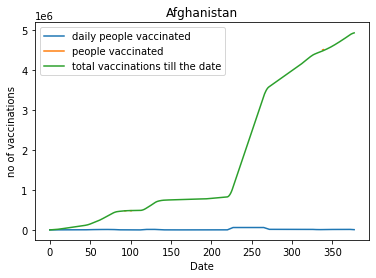

1
Accuracy scores: 
0.9189713101752605


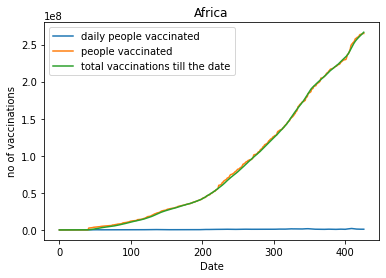

2
Accuracy scores: 
0.9844789696714495


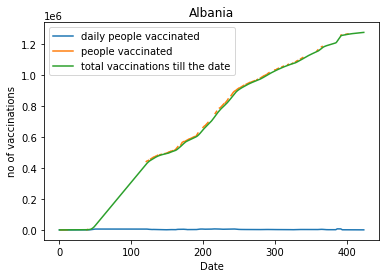

3
Accuracy scores: 
0.9603868703473402


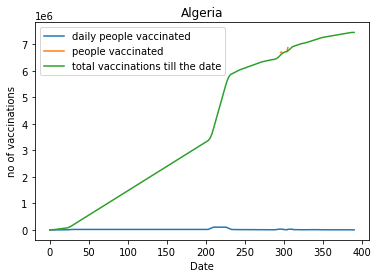

4
Accuracy scores: 
0.8800045598830539


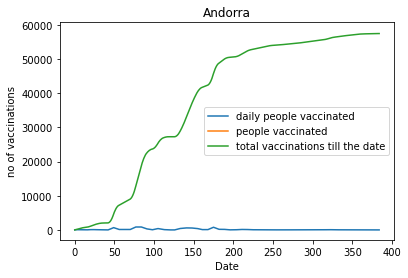

5
Accuracy scores: 
0.8599177518909613


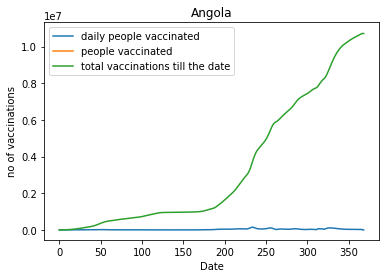

6
Accuracy scores: 
0.6438307270225718


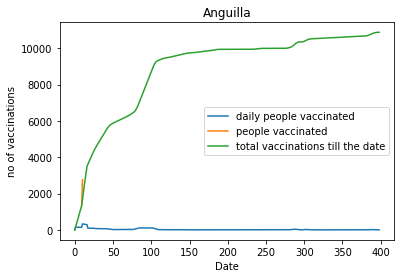

7
Accuracy scores: 
0.9327217223316573


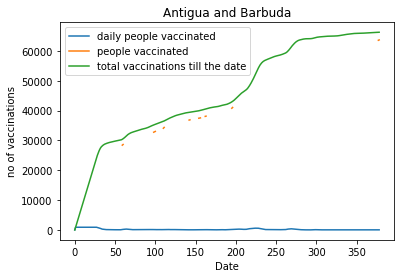

8
Accuracy scores: 
0.9659209068218381


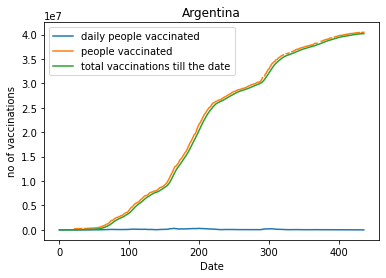

9
Accuracy scores: 
0.9168106963603775


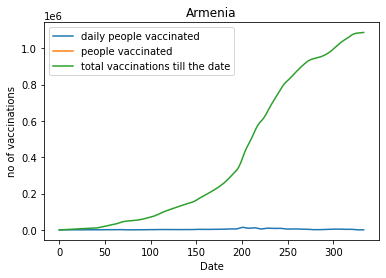

10
Accuracy scores: 
0.7471439182719978


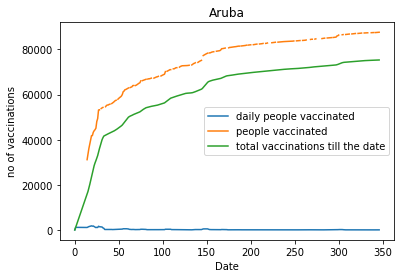

11
Accuracy scores: 
0.9370149700436393


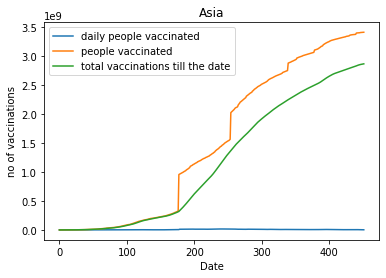

12
Accuracy scores: 
0.966863685840029


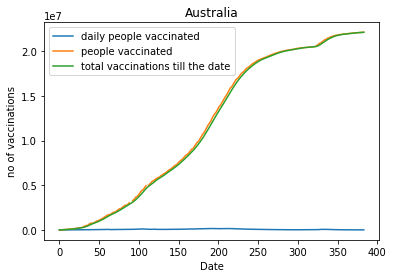

13
Accuracy scores: 
0.8892310469818347


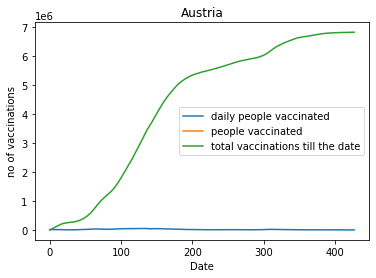

14
Accuracy scores: 
0.9311040214390107


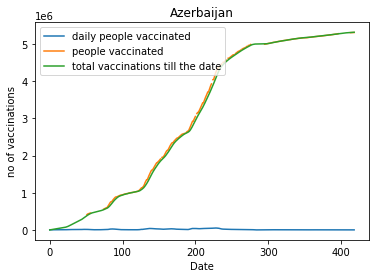

15
Accuracy scores: 
0.9543955567605227


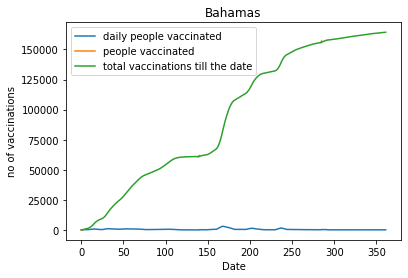

16
Accuracy scores: 
0.8338713180134119


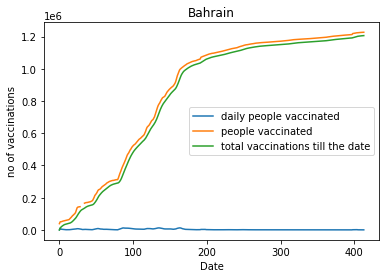

17
Accuracy scores: 
0.8417893788705298


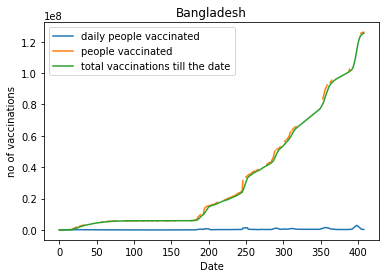

18
Accuracy scores: 
0.9470843239212757


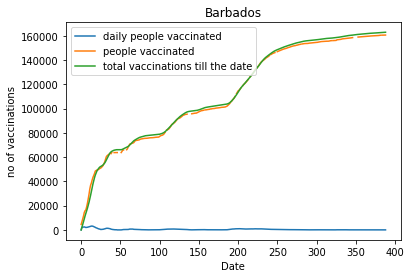

19
Accuracy scores: 
0.8845035975048355


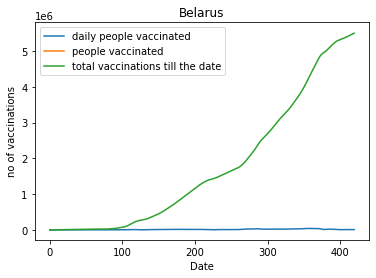

20
Accuracy scores: 
0.8620208139211895


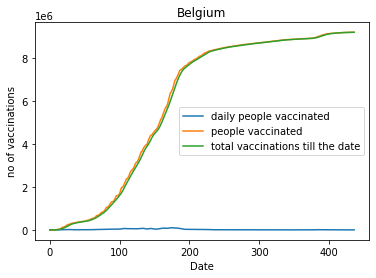

21
Accuracy scores: 
0.9270806334570195


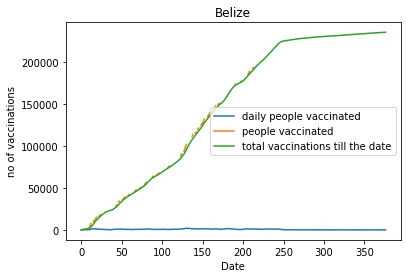

22
Accuracy scores: 
0.7157500943063961


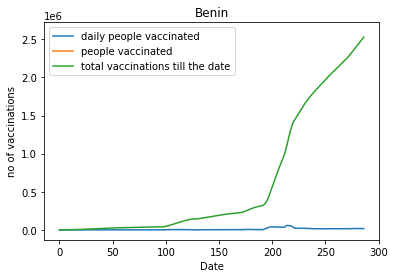

23
Accuracy scores: 
0.7769674338438988


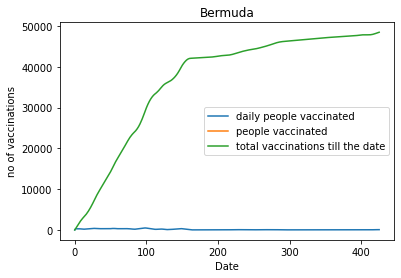

24
Accuracy scores: 
0.4147569639068781


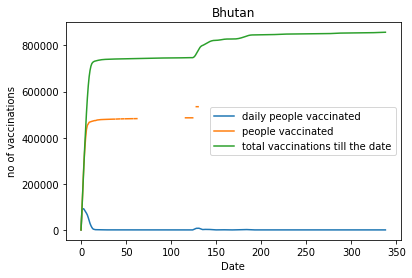

25
Accuracy scores: 
0.9835017164641692


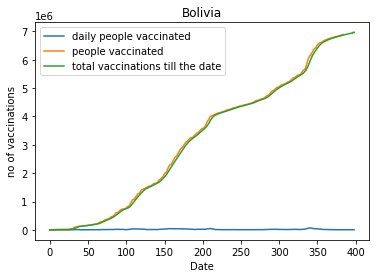

26
Accuracy scores: 
1.0


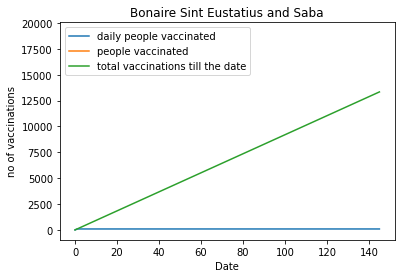

27
Accuracy scores: 
0.9721103513160199


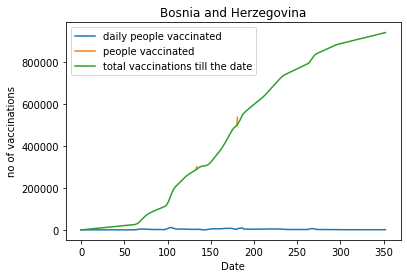

28
Accuracy scores: 
0.9237459687613819


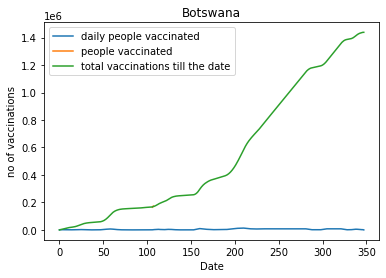

29
Accuracy scores: 
0.9389181604166545


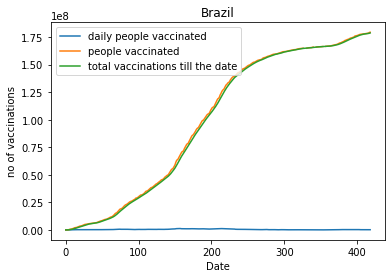

30
Accuracy scores: 
0.8038847838739762


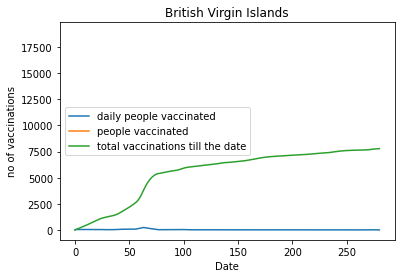

31
Accuracy scores: 
0.9502625292921326


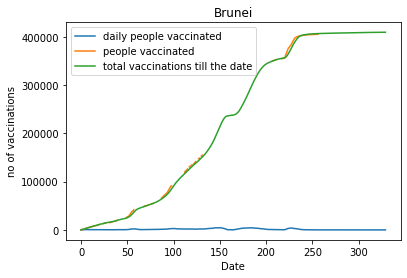

32
Accuracy scores: 
0.9797573695627729


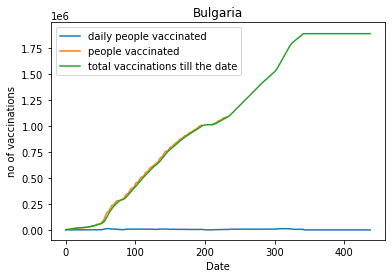

33
Accuracy scores: 
0.8048371304757099


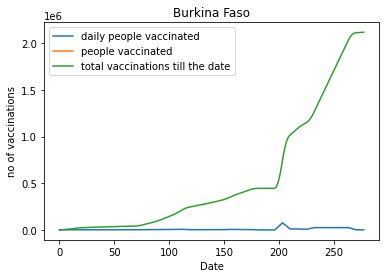

34
Accuracy scores: 
0.9807926278967671


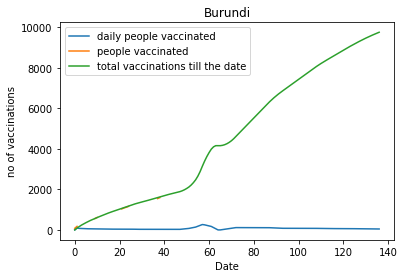

35
Accuracy scores: 
0.8940604735751763


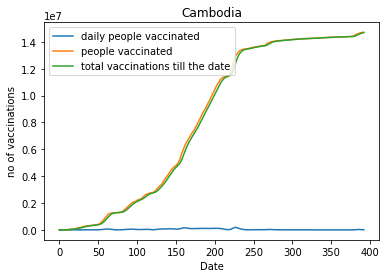

36
Accuracy scores: 
0.9415603607249615


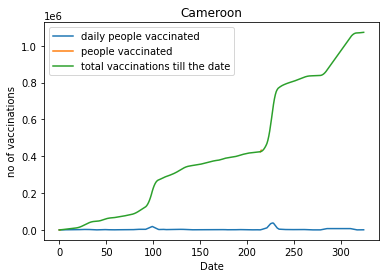

37
Accuracy scores: 
0.8568816540838791


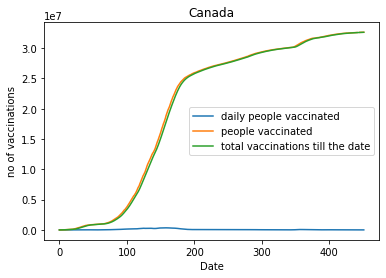

38
Accuracy scores: 
0.9251133576030173


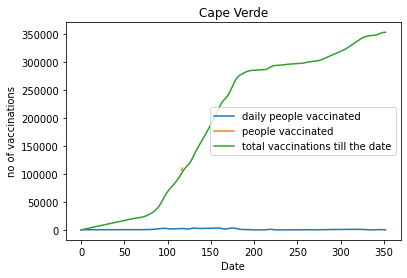

39
Accuracy scores: 
0.8528051425677704


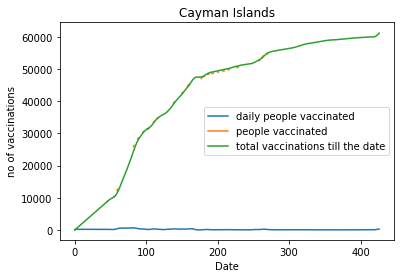

40
Accuracy scores: 
0.9380291401568067


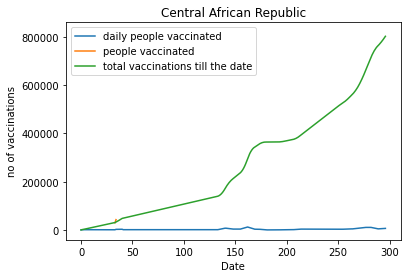

41
Accuracy scores: 
0.9704415154613332


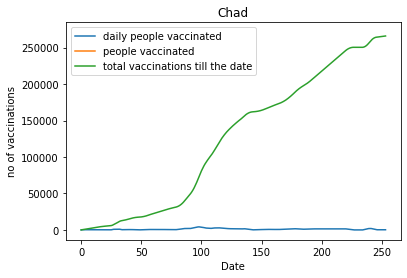

42
Accuracy scores: 
0.9026334781257148


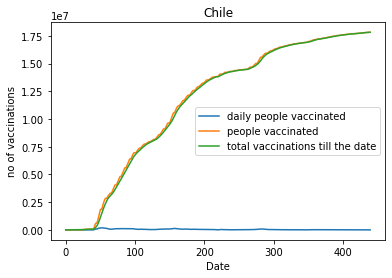

43
Accuracy scores: 
0.8894240005882174


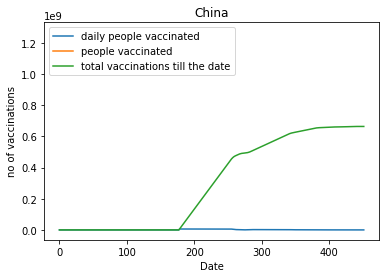

44
Accuracy scores: 
0.9803759427005283


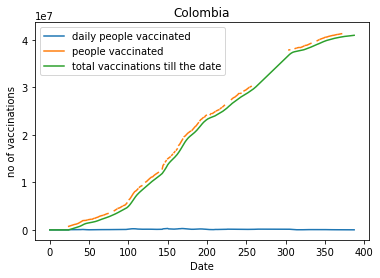

45
Accuracy scores: 
0.9685751971971188


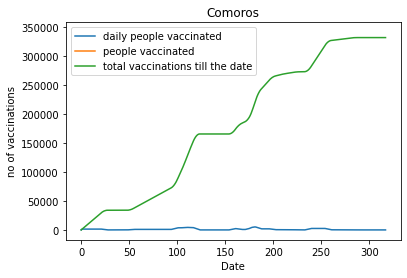

46
Accuracy scores: 
0.9397927341288552


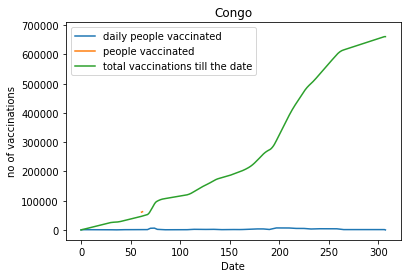

47
Accuracy scores: 
0.7020728232360419


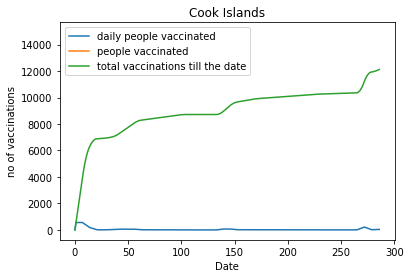

48
Accuracy scores: 
0.949863926688329


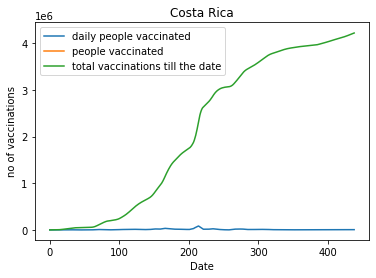

49
Accuracy scores: 
0.8697549824843143


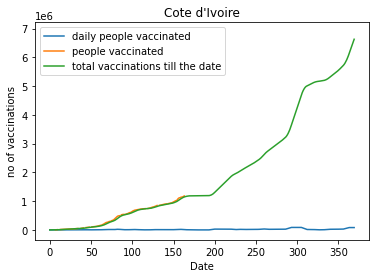

50
Accuracy scores: 
0.9258886402506747


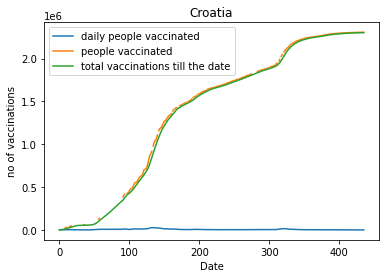

51
Accuracy scores: 
0.8257043787455847


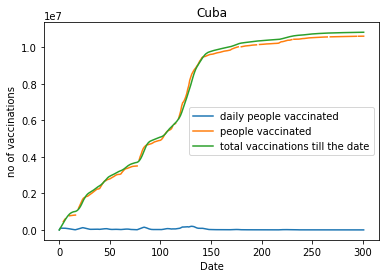

52
Accuracy scores: 
0.5631932697253157


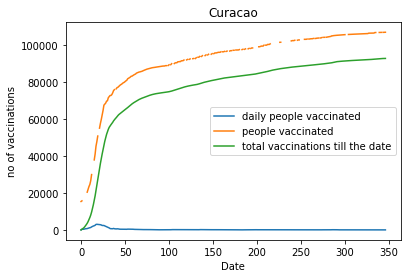

53
Accuracy scores: 
0.8912733737907692


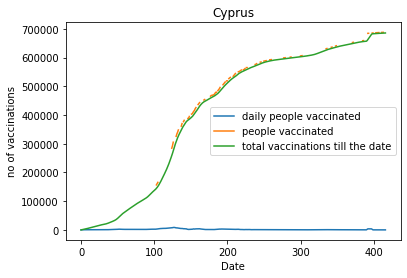

54
Accuracy scores: 
0.879415521800146


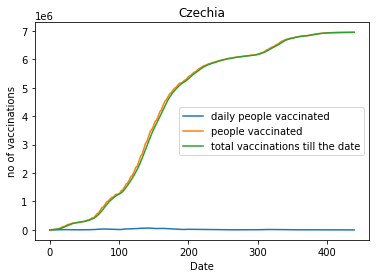

55
Accuracy scores: 
0.6683022116500723


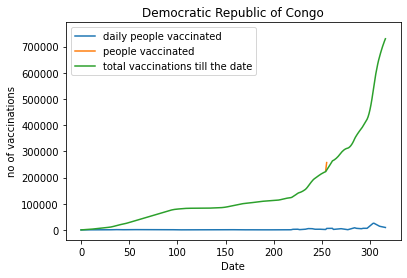

56
Accuracy scores: 
0.9033294667927168


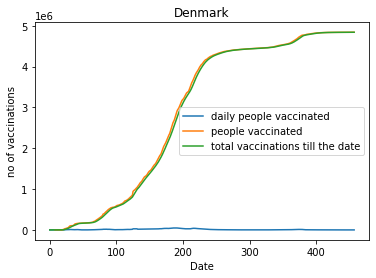

57
Accuracy scores: 
0.9523561902508153


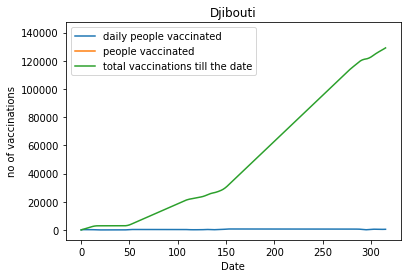

58
Accuracy scores: 
0.8716682570254786


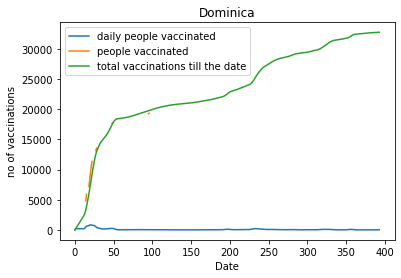

59
Accuracy scores: 
0.7989475241362777


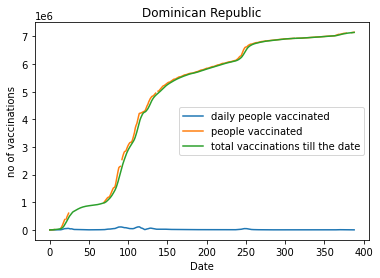

60
Accuracy scores: 
0.9090881680338666


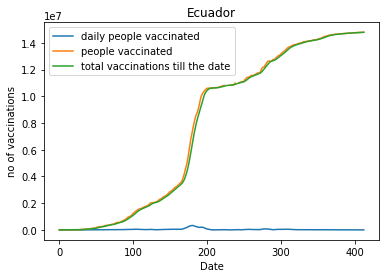

61
Accuracy scores: 
0.8433491472607186


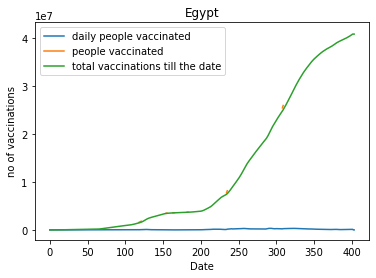

62
Accuracy scores: 
0.9290541245398537


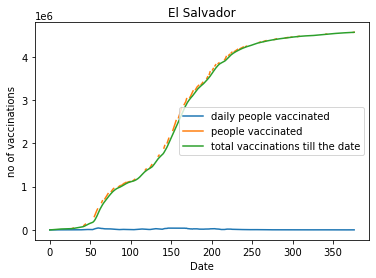

63
Accuracy scores: 
0.7957799349942554


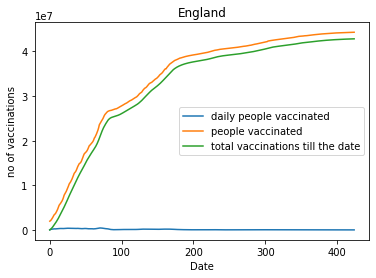

64
Accuracy scores: 
0.8568559950212192


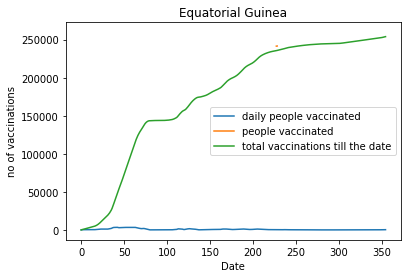

65
Accuracy scores: 
0.9206982845860473


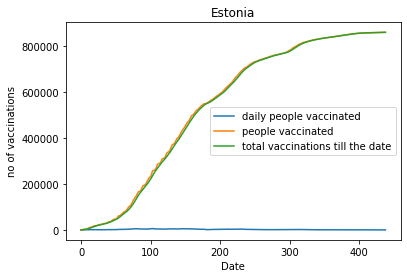

66
Accuracy scores: 
0.9342964027248645


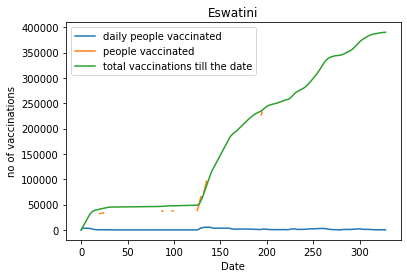

67
Accuracy scores: 
0.6402171149595832


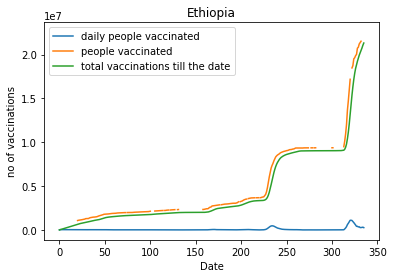

68
Accuracy scores: 
0.9510067444321614


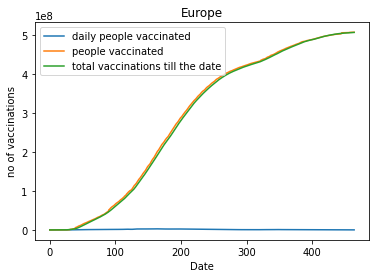

69
Accuracy scores: 
0.9119670495730703


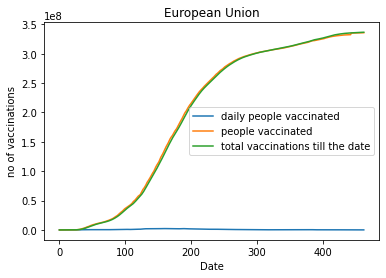

70
Accuracy scores: 
0.8655695844832958


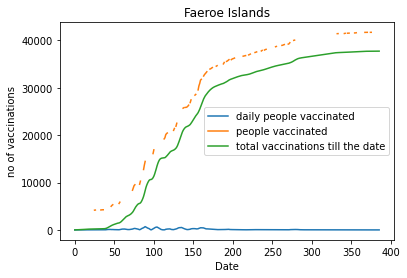

71
Accuracy scores: 
0.6645118808690134


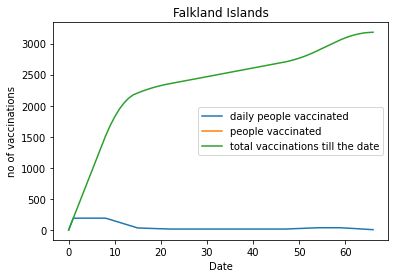

72
Accuracy scores: 
0.8680791768163667


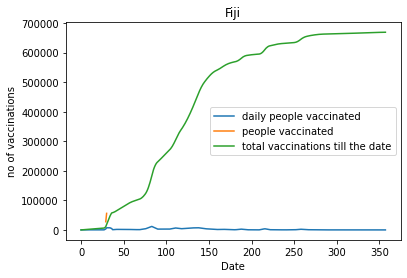

73
Accuracy scores: 
0.8514413613979799


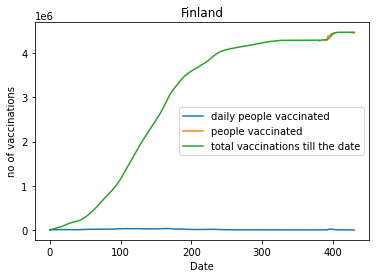

74
Accuracy scores: 
0.8817721970722333


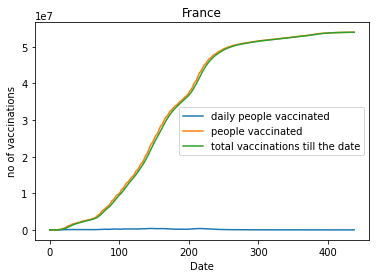

75
Accuracy scores: 
0.9507842577329237


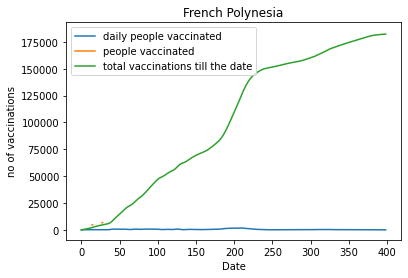

76
Accuracy scores: 
0.923688847823262


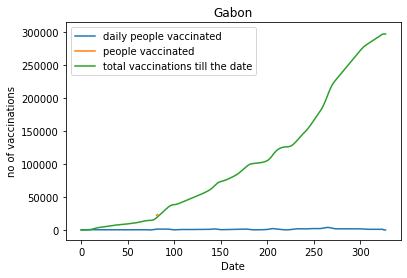

77
Accuracy scores: 
0.9464652512418367


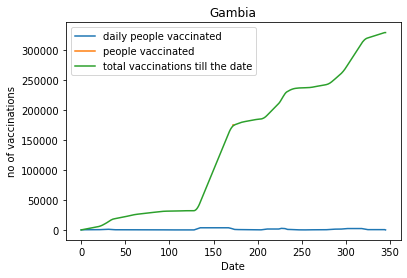

78
Accuracy scores: 
0.9610969116548806


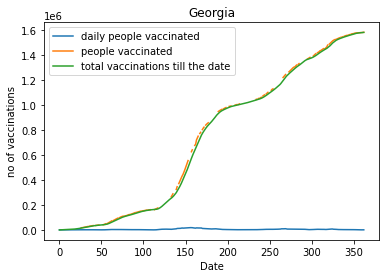

79
Accuracy scores: 
0.8673278467019747


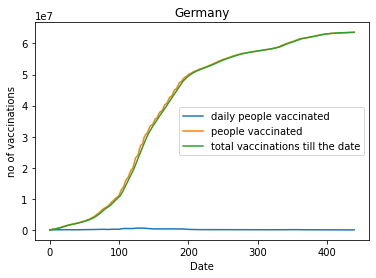

80
Accuracy scores: 
0.6276014723842938


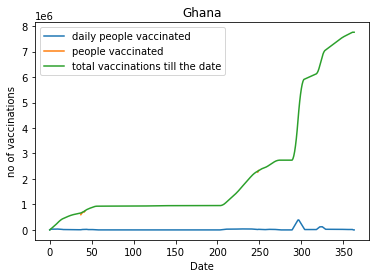

81
Accuracy scores: 
0.553672455591877


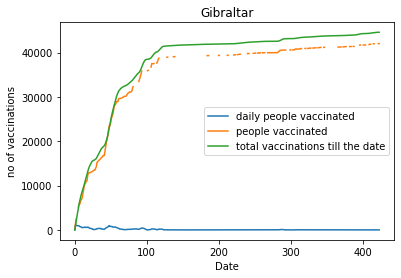

82
Accuracy scores: 
0.9412824207242091


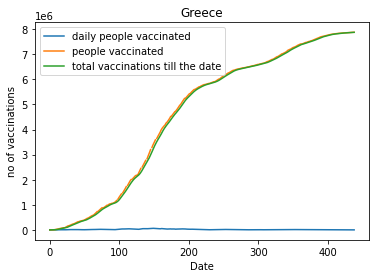

83
Accuracy scores: 
0.8497508270092501


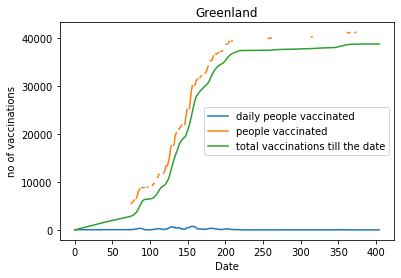

84
Accuracy scores: 
0.965584148388812


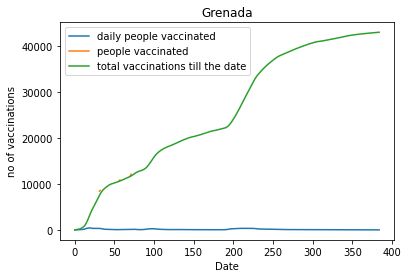

85
Accuracy scores: 
0.9490170592315641


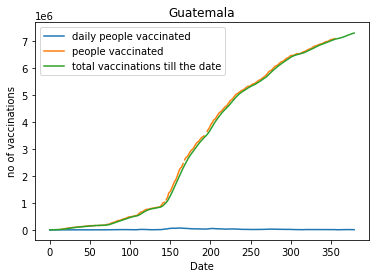

86
Accuracy scores: 
0.8832028602042581


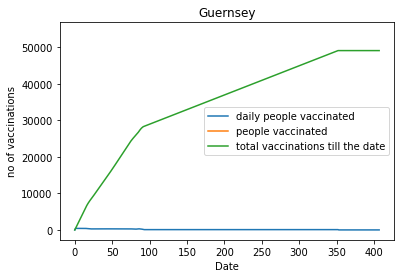

87
Accuracy scores: 
0.8719812020054196


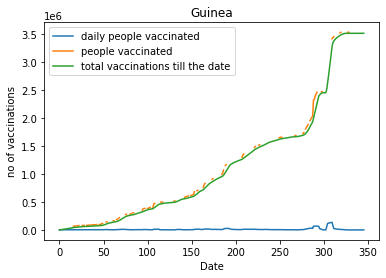

88
Accuracy scores: 
0.8814001588092318


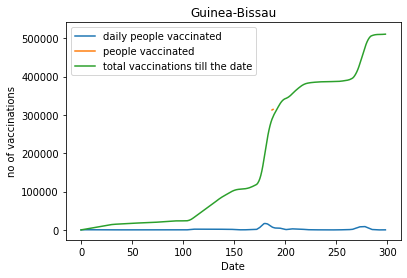

89
Accuracy scores: 
0.9396125147715153


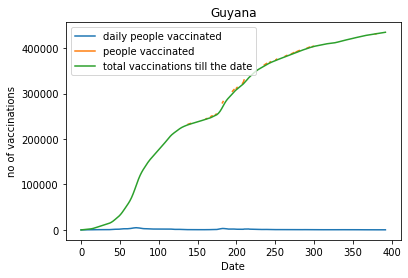

90
Accuracy scores: 
0.9627002349896693


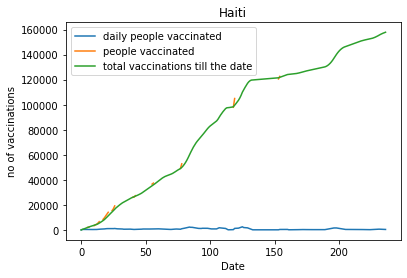

91
Accuracy scores: 
0.9422199391160582


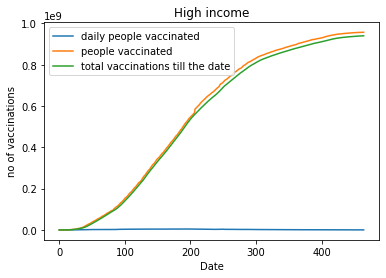

92
Accuracy scores: 
0.9653194576721671


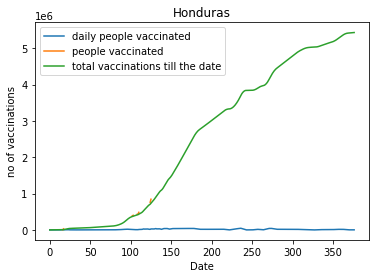

93
Accuracy scores: 
0.9241021447884811


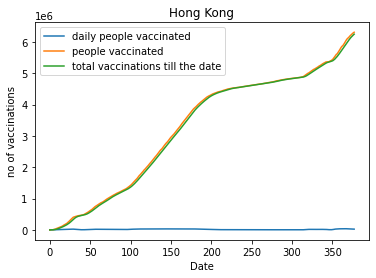

94
Accuracy scores: 
0.7962988879245125


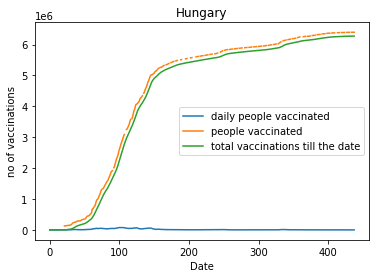

95
Accuracy scores: 
0.8167705263692123


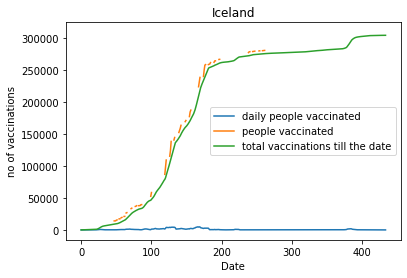

96
Accuracy scores: 
0.9760311721719581


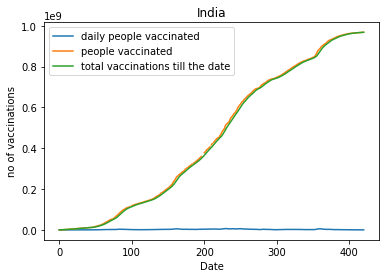

97
Accuracy scores: 
0.9452928032461708


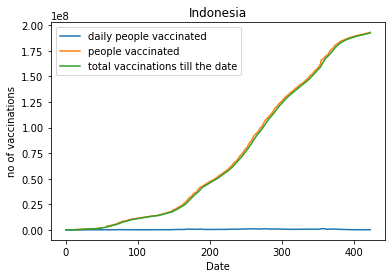

98
Accuracy scores: 
0.8858906477755083


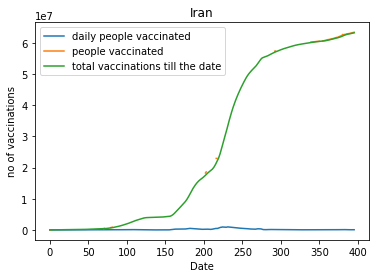

99
Accuracy scores: 
0.9441834569895216


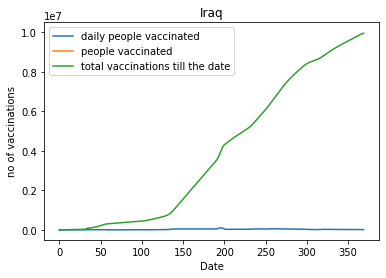

100
Accuracy scores: 
0.8379590453555441


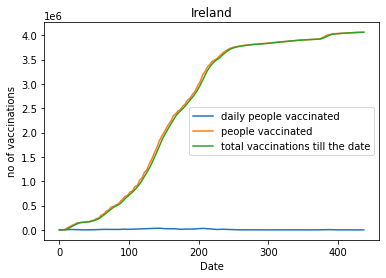

101
Accuracy scores: 
0.5523807143473665


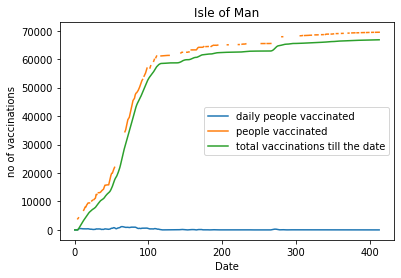

102
Accuracy scores: 
0.6759638522730027


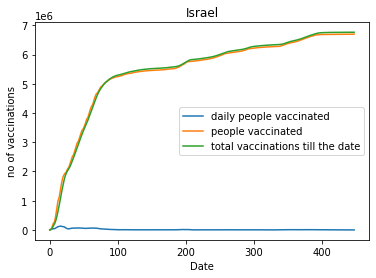

103
Accuracy scores: 
0.9237264489724307


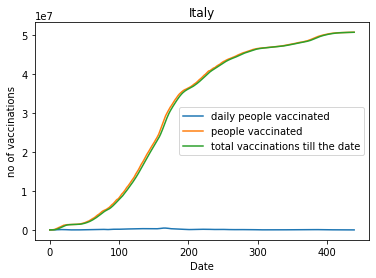

104
Accuracy scores: 
0.945421148084293


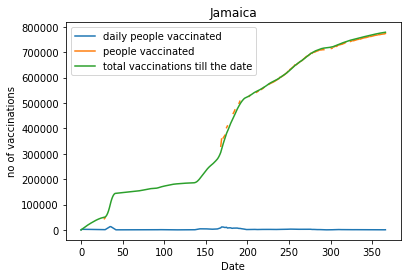

105
Accuracy scores: 
0.9198228427084442


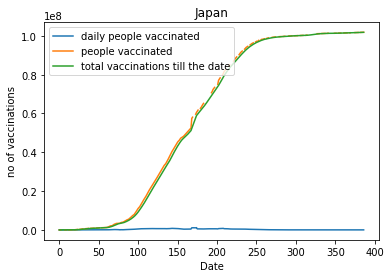

106
Accuracy scores: 
0.8061940213048885


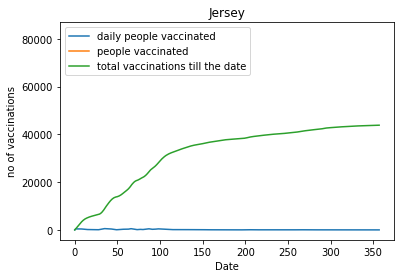

107
Accuracy scores: 
0.9465919375931746


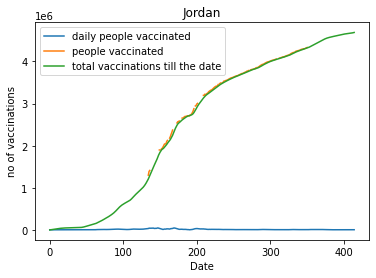

108
Accuracy scores: 
0.9360514940441436


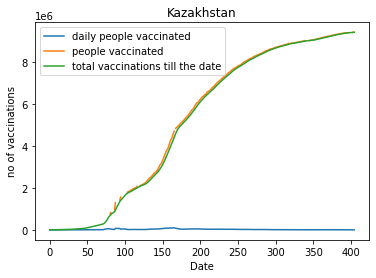

109
Accuracy scores: 
0.8227971061317042


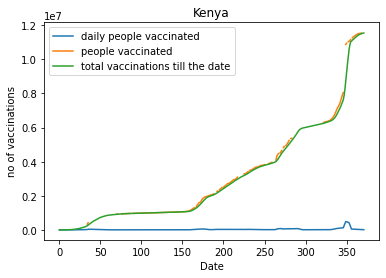

110
Accuracy scores: 
0.9546133271638094


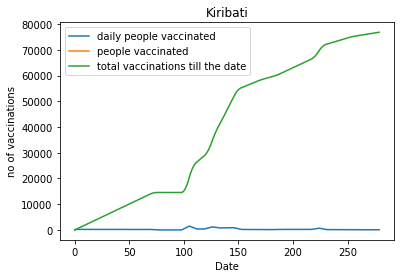

111
Accuracy scores: 
0.9137294045191675


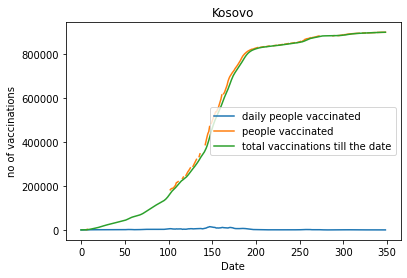

112
Accuracy scores: 
0.9790248757507106


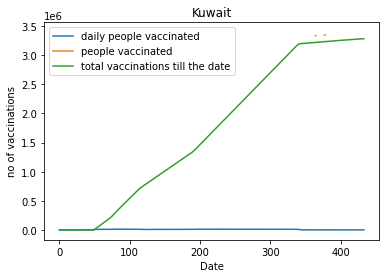

113
Accuracy scores: 
0.9769554866228068


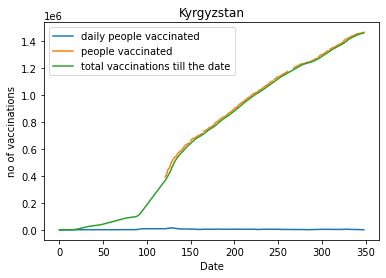

114
Accuracy scores: 
0.9807742774206546


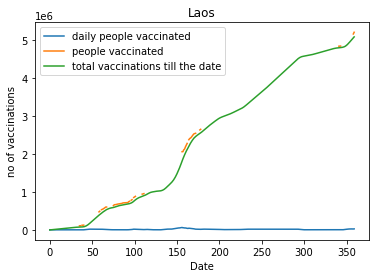

115
Accuracy scores: 
0.973545781421261


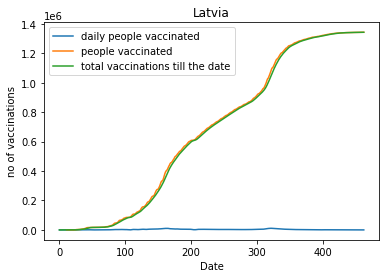

116
Accuracy scores: 
0.9900090007752739


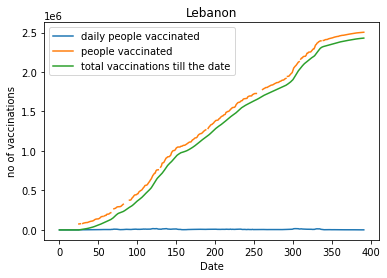

117
Accuracy scores: 
0.8920085723596388


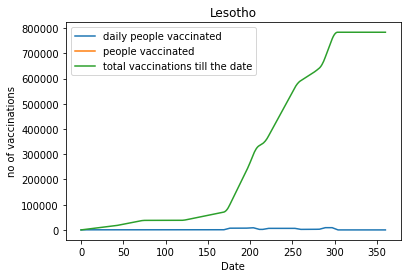

118
Accuracy scores: 
0.6864850422065834


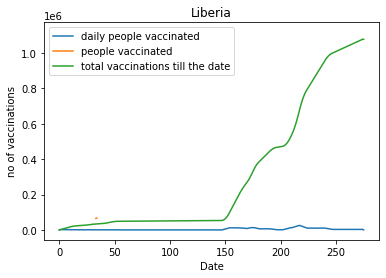

119
Accuracy scores: 
0.9738658090399012


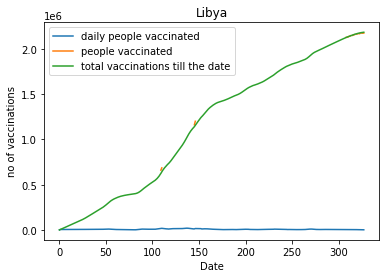

120
Accuracy scores: 
0.8905069846275141


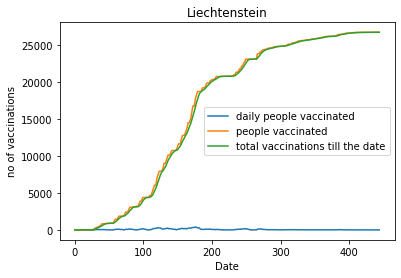

121
Accuracy scores: 
0.925855331190792


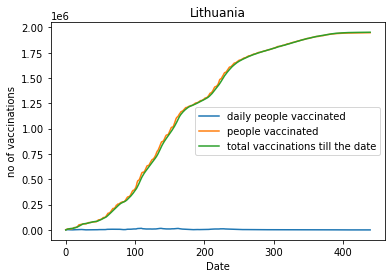

122
Accuracy scores: 
0.7982312323363046


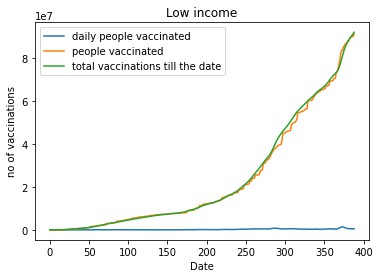

123
Accuracy scores: 
0.9591853691820597


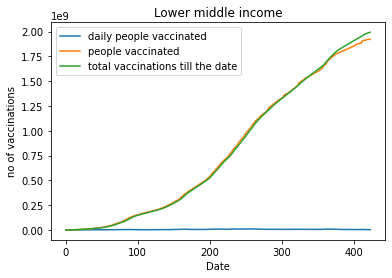

124
Accuracy scores: 
0.8988066488143831


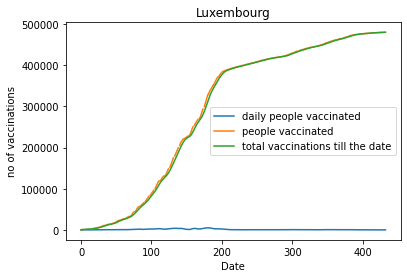

125
Accuracy scores: 
0.9614794367279846


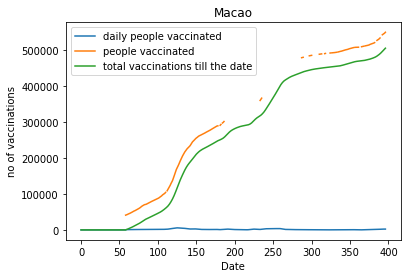

126
Accuracy scores: 
0.896126569158437


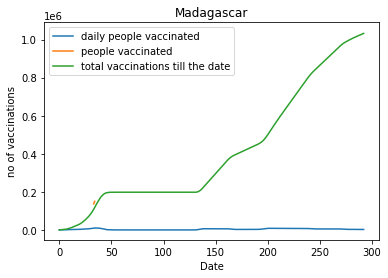

127
Accuracy scores: 
0.9578914223998771


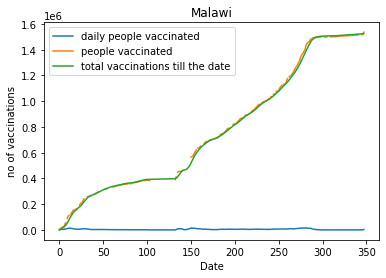

128
Accuracy scores: 
0.8644690721104769


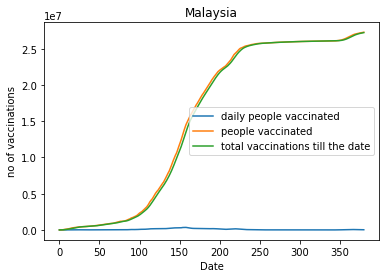

129
Accuracy scores: 
0.703381871698431


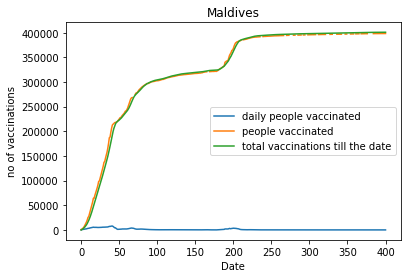

130
Accuracy scores: 
0.8837655900829487


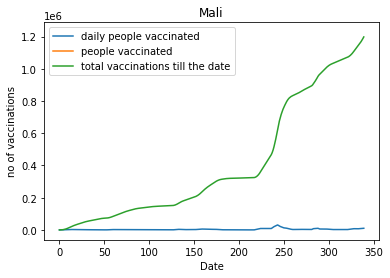

131
Accuracy scores: 
0.8066722175786996


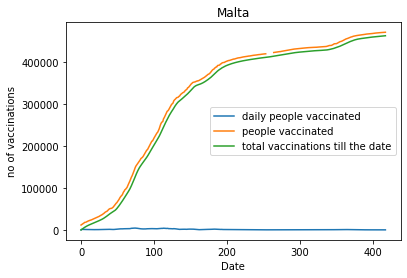

132
Accuracy scores: 
0.9137401441399321


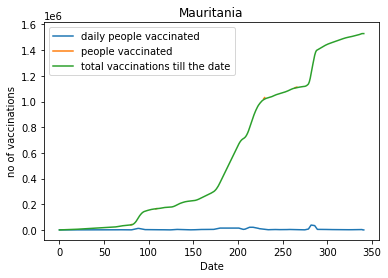

133
Accuracy scores: 
0.9139823288264761


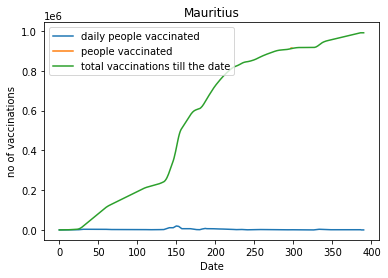

134
Accuracy scores: 
0.9687700635990236


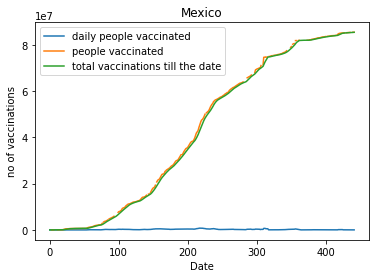

135
Accuracy scores: 
0.9209918661715326


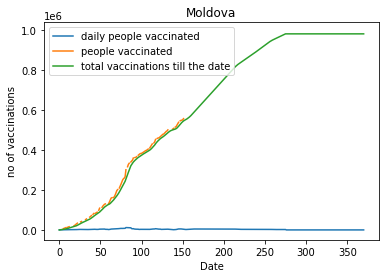

136
Accuracy scores: 
0.9532890997343744


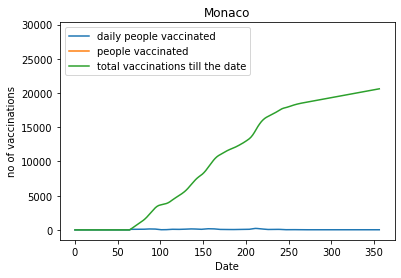

137
Accuracy scores: 
0.6201358009755239


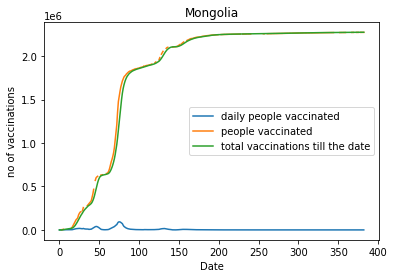

138
Accuracy scores: 
0.9266215397354691


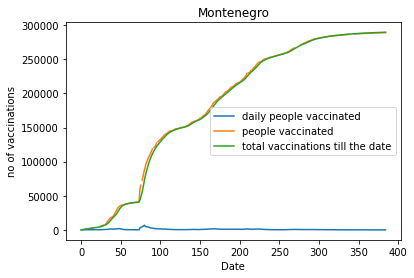

139
Accuracy scores: 
0.6691812321595811


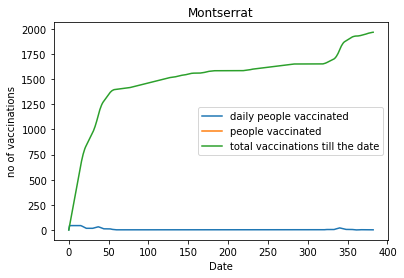

140
Accuracy scores: 
0.9305463113008617


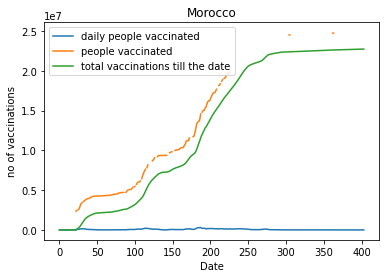

141
Accuracy scores: 
0.8248471892458282


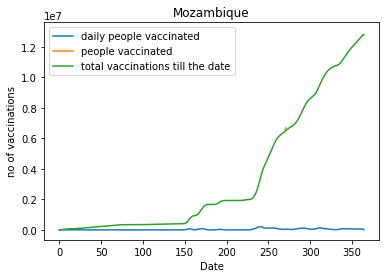

142
Accuracy scores: 
0.8618595871777894


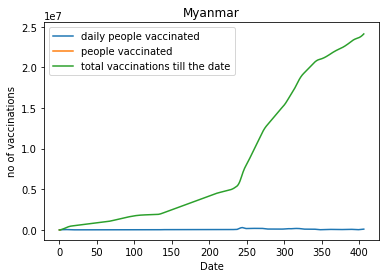

143
Accuracy scores: 
0.9924077976920306


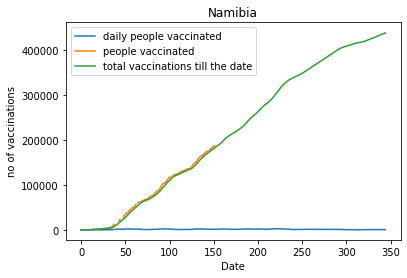

144
Accuracy scores: 
0.37702241240420964


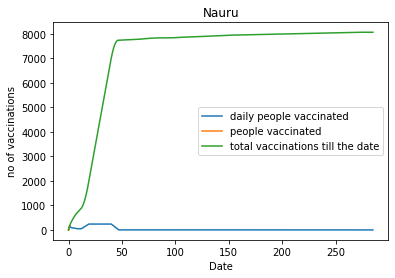

145
Accuracy scores: 
0.8700231016014492


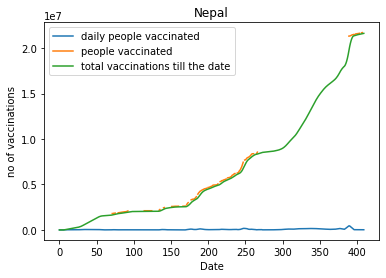

146
Accuracy scores: 
0.8149568376998791


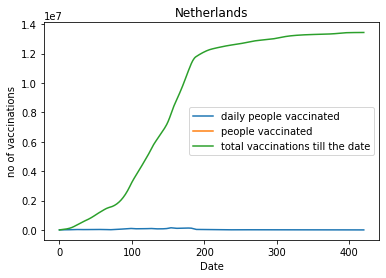

147
Accuracy scores: 
0.9482973761055369


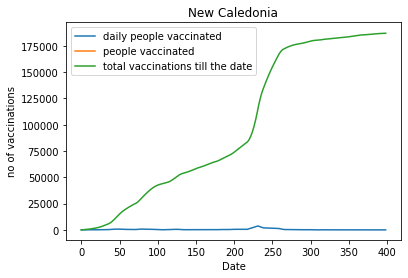

148
Accuracy scores: 
0.913933467976643


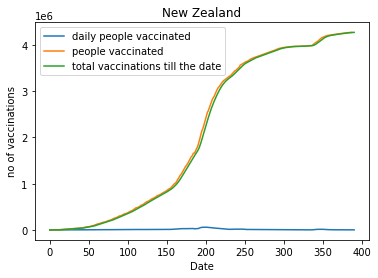

149
Accuracy scores: 
0.7785245536897898


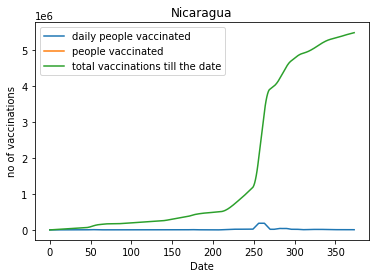

150
Accuracy scores: 
0.844148889699953


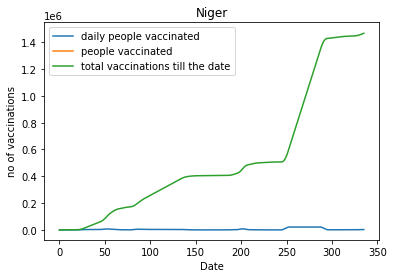

151
Accuracy scores: 
0.80557406354162


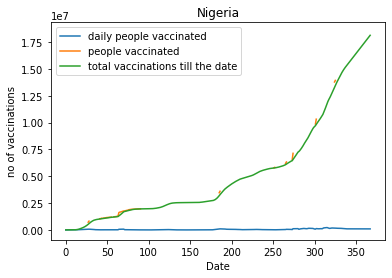

152
Accuracy scores: 
-0.5975286053560567


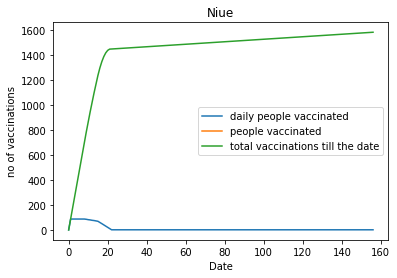

153
Accuracy scores: 
0.9556864614158842


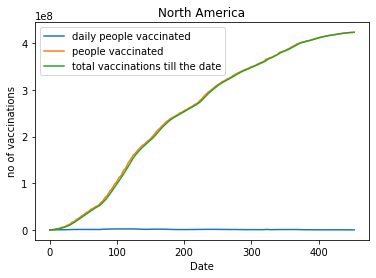

154
Accuracy scores: 
0.9185783812105168


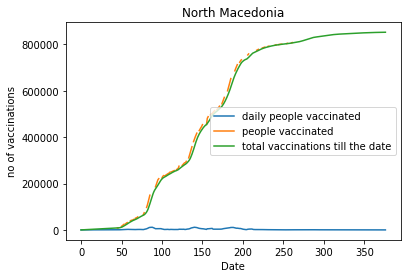

155
Accuracy scores: 
0.88923657131366


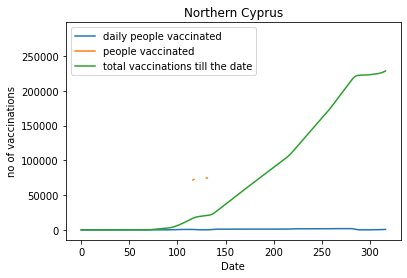

156
Accuracy scores: 
0.8054525495048102


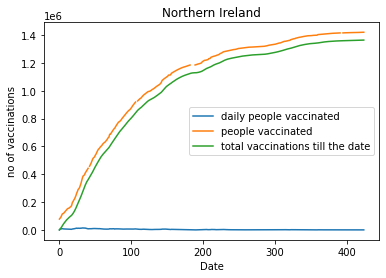

157
Accuracy scores: 
0.9273212706579033


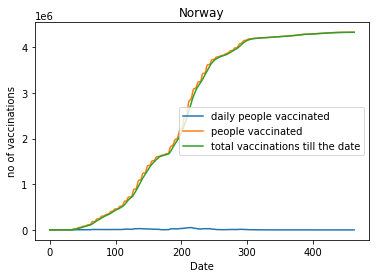

158
Accuracy scores: 
0.956774165004058


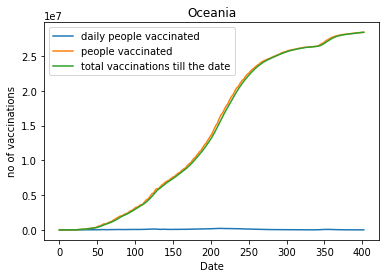

159
Accuracy scores: 
0.9114201650468196


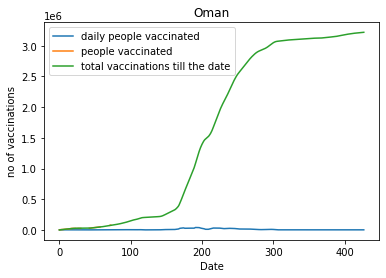

160
Accuracy scores: 
0.9425894441209475


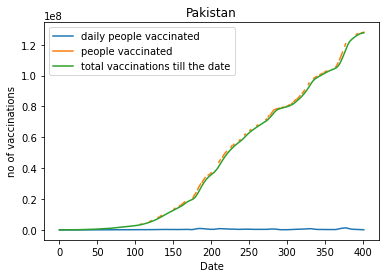

161
Accuracy scores: 
0.945798619337246


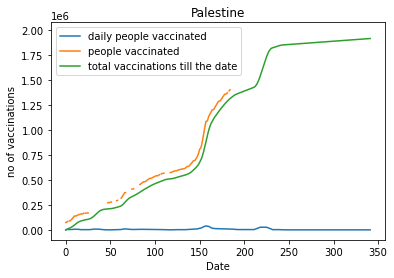

162
Accuracy scores: 
0.9015728395454945


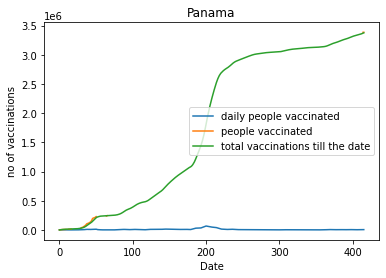

163
Accuracy scores: 
0.9604663311662155


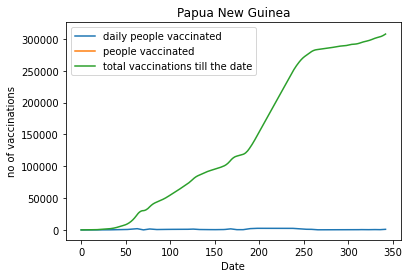

164
Accuracy scores: 
0.9465072833427808


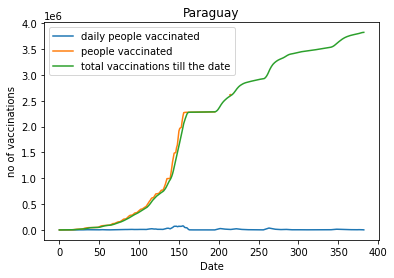

165
Accuracy scores: 
0.9631161797712696


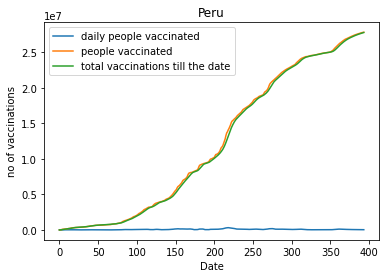

166
Accuracy scores: 
0.9255375186185519


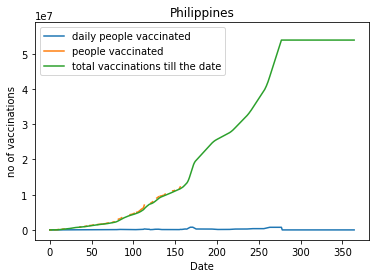

167
Accuracy scores: 
1.0


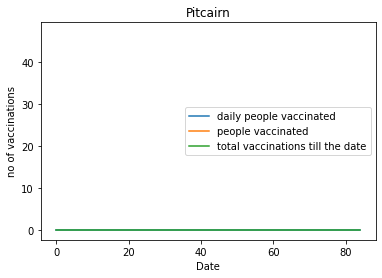

168
Accuracy scores: 
0.8719674144774454


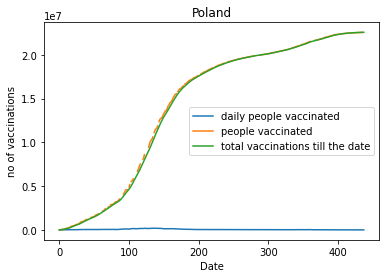

169
Accuracy scores: 
0.9290732744597684


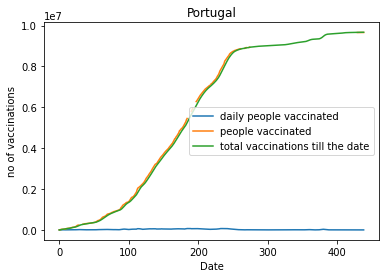

170
Accuracy scores: 
0.8775878423485287


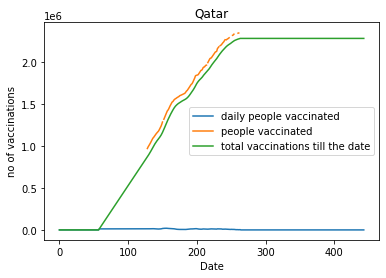

171
Accuracy scores: 
0.9638402650268141


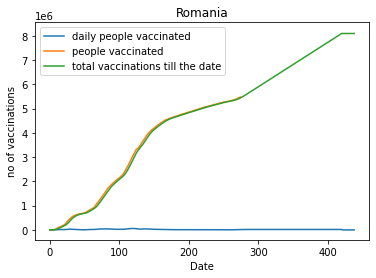

172
Accuracy scores: 
0.9754830798581966


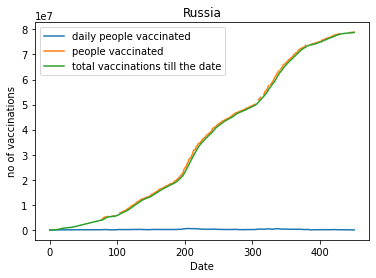

173
Accuracy scores: 
0.8157538663046408


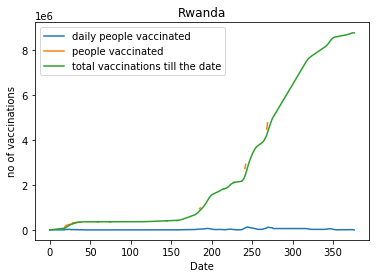

174
Accuracy scores: 
0.9095894047829547


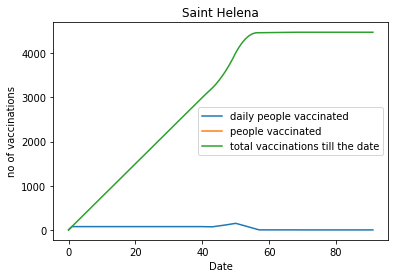

175
Accuracy scores: 
0.832030427680899


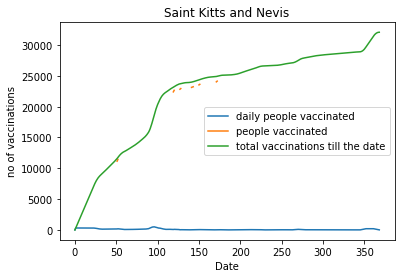

176
Accuracy scores: 
0.9370700586659085


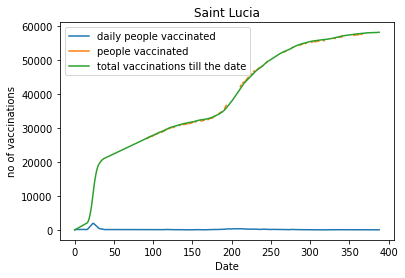

177
Accuracy scores: 
0.9442551193145566


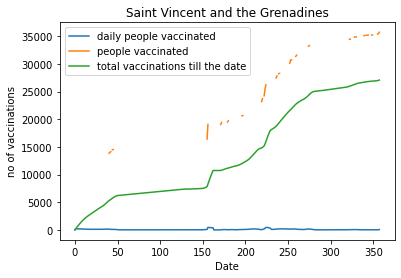

178
Accuracy scores: 
0.9506057283181599


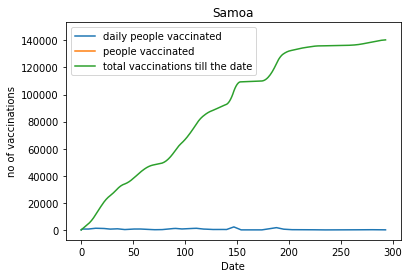

179
Accuracy scores: 
0.5561468746070218


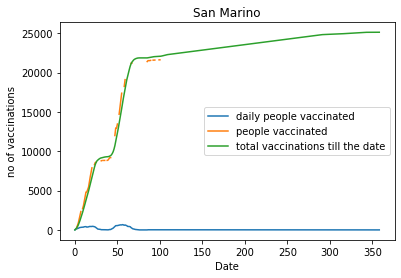

180
Accuracy scores: 
0.9539254613232777


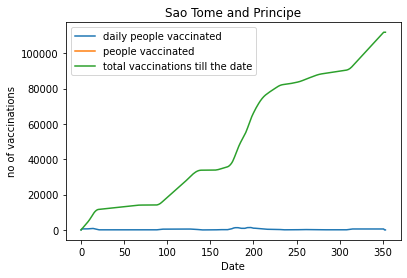

181
Accuracy scores: 
0.8705416309251642


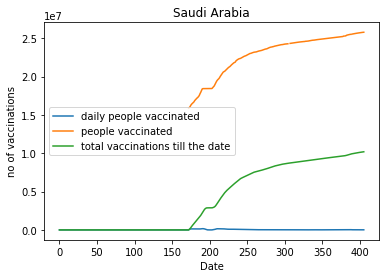

182
Accuracy scores: 
0.7923159034753046


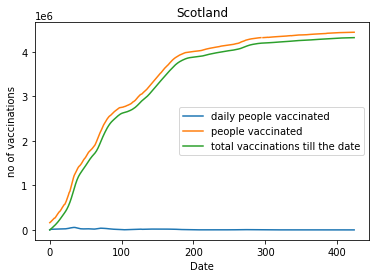

183
Accuracy scores: 
0.9092064839496086


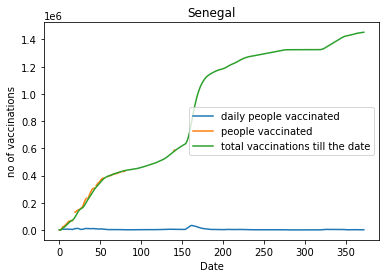

184
Accuracy scores: 
0.8030655705940918


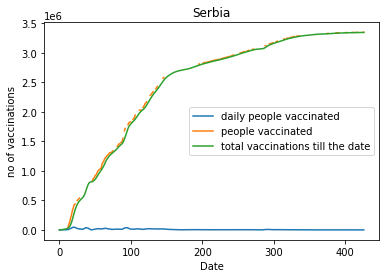

185
Accuracy scores: 
0.6228643064790529


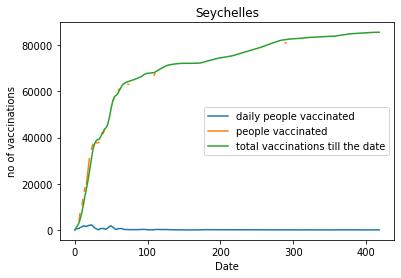

186
Accuracy scores: 
0.8015186095599501


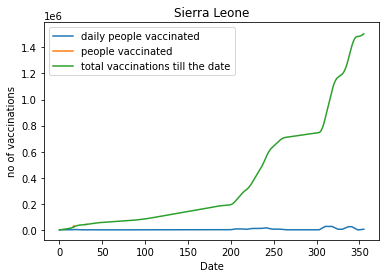

187
Accuracy scores: 
0.8719740219594045


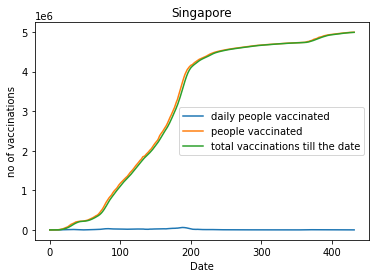

188
Accuracy scores: 
0.7188972234674149


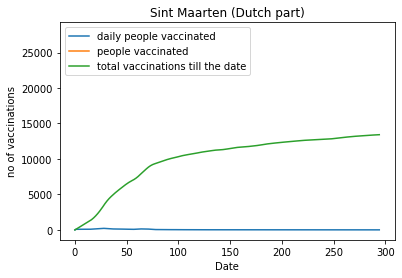

189
Accuracy scores: 
0.886793081361933


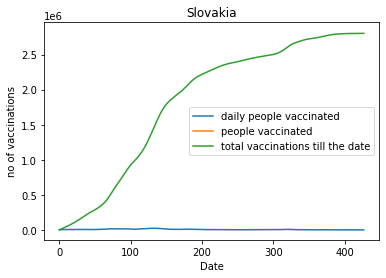

190
Accuracy scores: 
0.9283519969047924


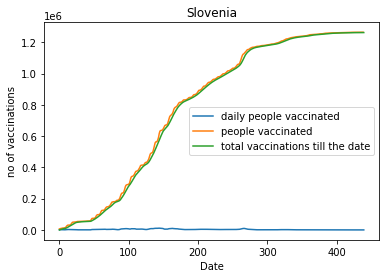

191
Accuracy scores: 
0.9536102773929649


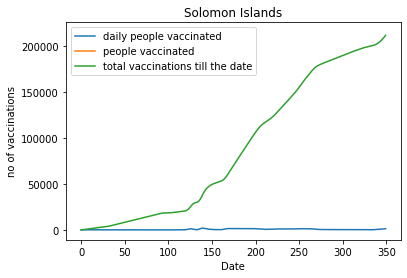

192
Accuracy scores: 
0.8088398745225731


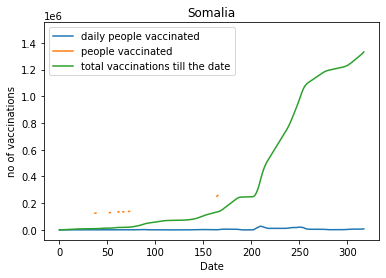

193
Accuracy scores: 
0.9484457511626573


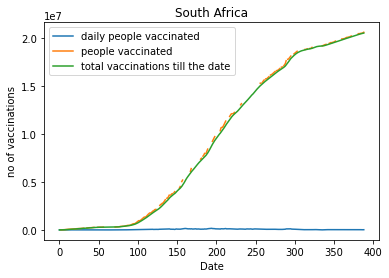

194
Accuracy scores: 
0.9607582444420364


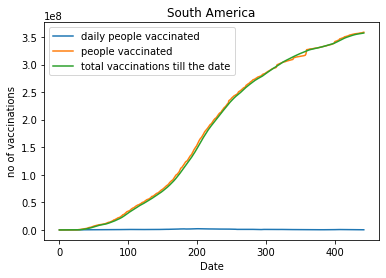

195
Accuracy scores: 
0.9284654767168227


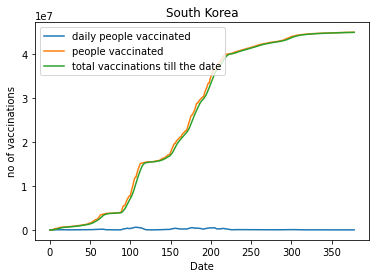

196
Accuracy scores: 
0.8431861399242331


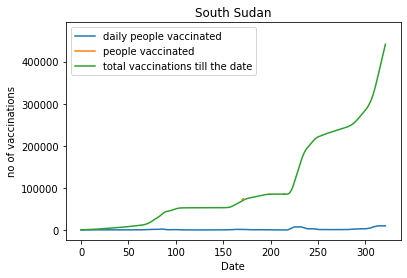

197
Accuracy scores: 
0.90707902369225


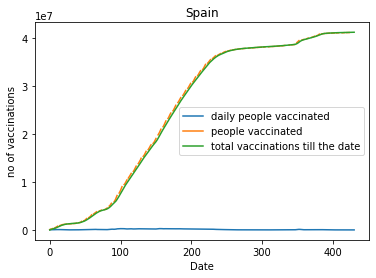

198
Accuracy scores: 
0.9067780689971146


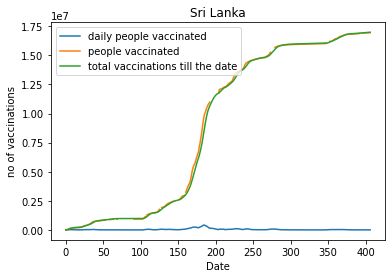

199
Accuracy scores: 
0.8025298000403945


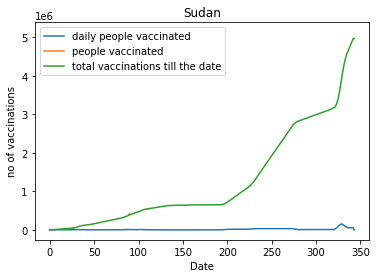

200
Accuracy scores: 
0.902885981793474


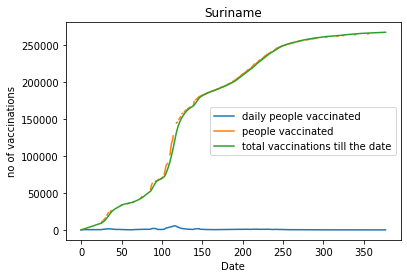

201
Accuracy scores: 
0.881300957949249


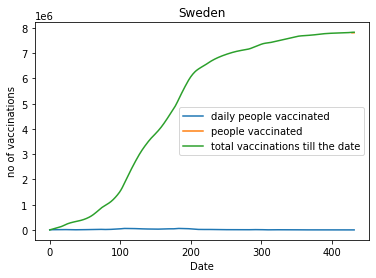

202
Accuracy scores: 
0.8863992867660078


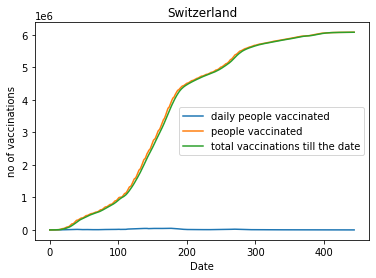

203
Accuracy scores: 
0.8353160701612781


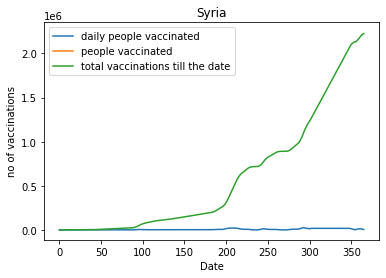

204
Accuracy scores: 
0.9382579888763594


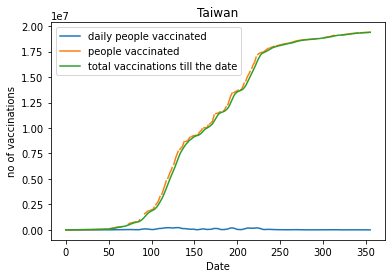

205
Accuracy scores: 
0.9770264152558882


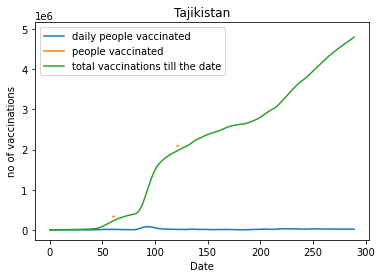

206
Accuracy scores: 
0.9835863215267829


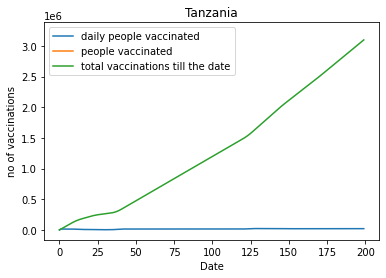

207
Accuracy scores: 
0.9519893178094104


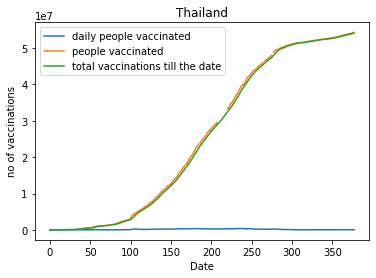

208
Accuracy scores: 
0.9639438353190342


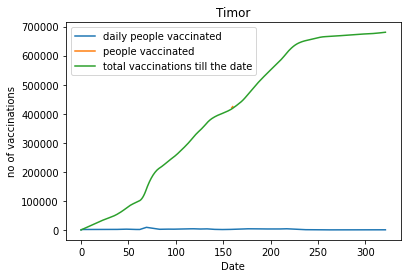

209
Accuracy scores: 
0.9353375592246052


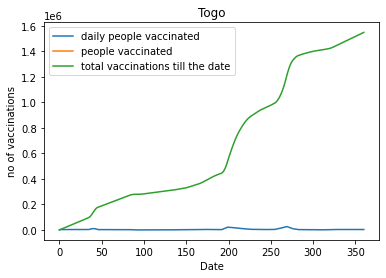

210
Accuracy scores: 
0.6922204209765923


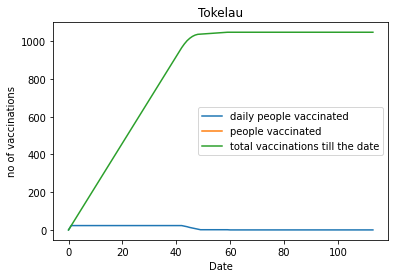

211
Accuracy scores: 
0.9541654619905298


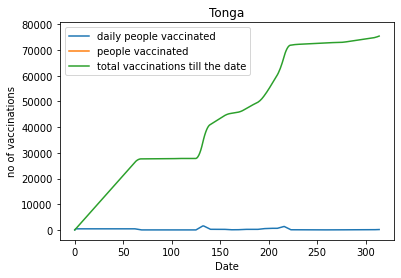

212
Accuracy scores: 
0.9410859882084732


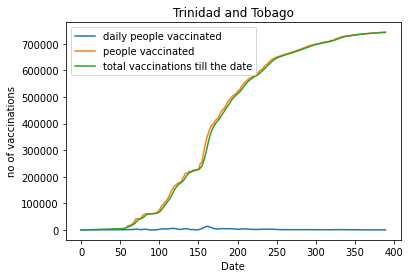

213
Accuracy scores: 
0.970101635139254


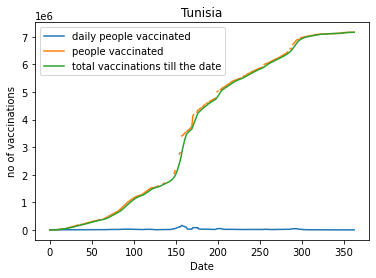

214
Accuracy scores: 
0.9129585751388279


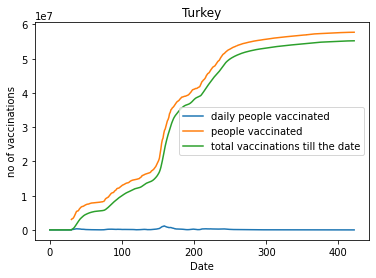

215
Accuracy scores: 
1.0


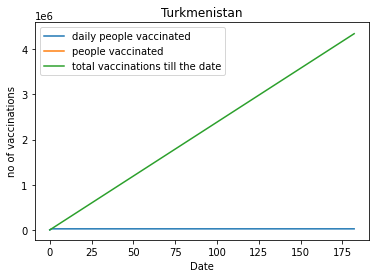

216
Accuracy scores: 
0.8699359865113645


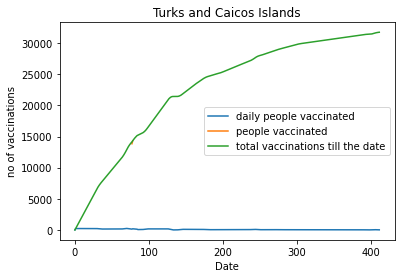

217
Accuracy scores: 
0.8262726848452746


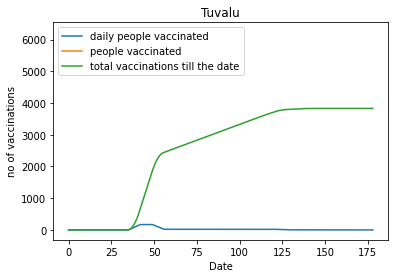

218
Accuracy scores: 
0.7491005269950657


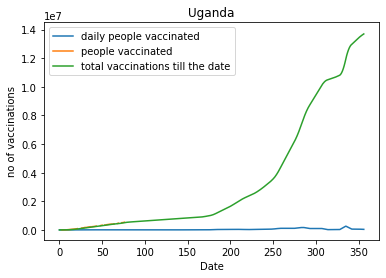

219
Accuracy scores: 
0.9271178630031621


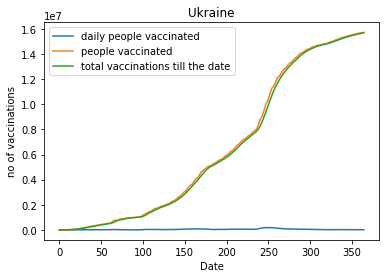

220
Accuracy scores: 
0.9148660074560383


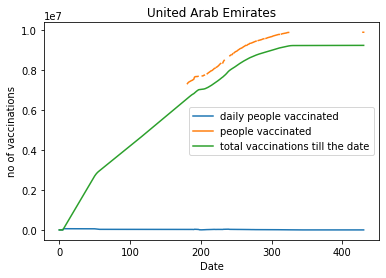

221
Accuracy scores: 
0.7897121809733545


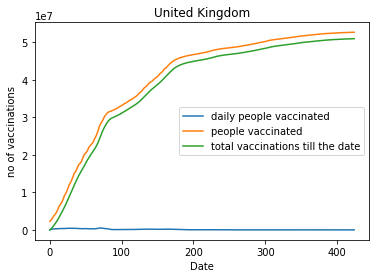

222
Accuracy scores: 
0.8747249217048061


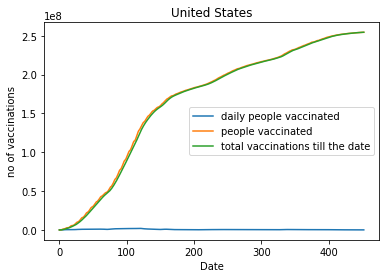

223
Accuracy scores: 
0.9348248315901214


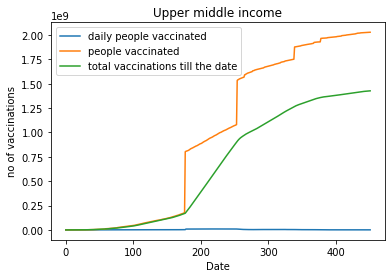

224
Accuracy scores: 
0.7216734502706056


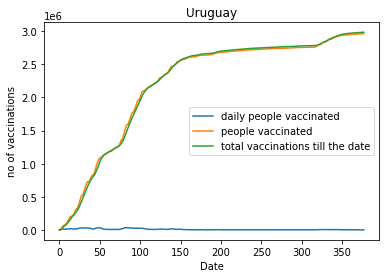

225
Accuracy scores: 
0.957833555695716


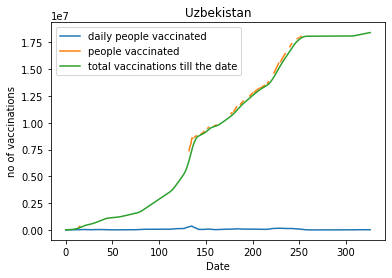

226
Accuracy scores: 
0.9820322332315509


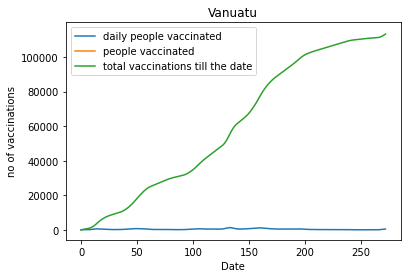

227
Accuracy scores: 
0.9366964798910015


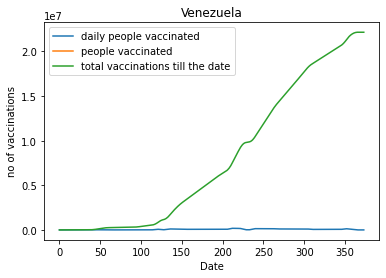

228
Accuracy scores: 
0.9035093541445334


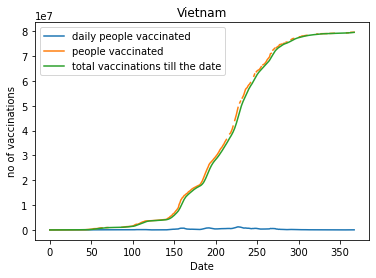

229
Accuracy scores: 
0.6964896112064836


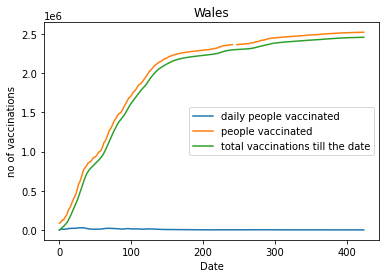

230
Accuracy scores: 
0.8038634314307386


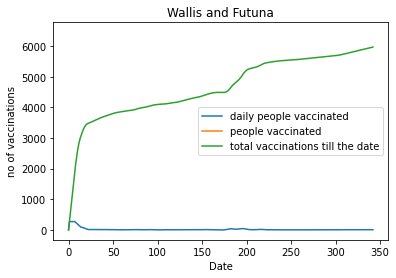

231
Accuracy scores: 
0.9728225318660104


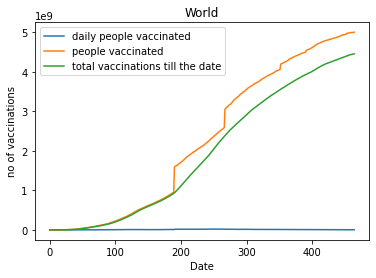

232
Accuracy scores: 
0.8964497009597371


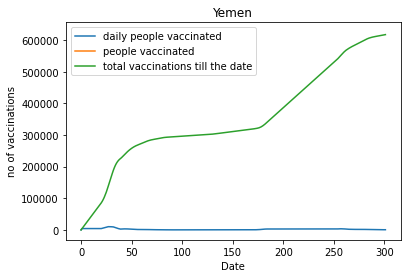

233
Accuracy scores: 
0.8706162478072499


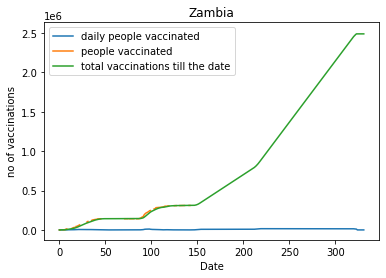

234
Accuracy scores: 
0.9593149765501016


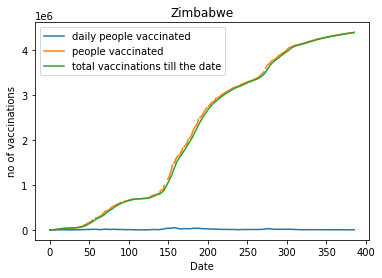

235


In [ ]:
count = 0
neigh = {}

for country in data.location.unique():

  count += 1
  temp_df = data[data['location'] == country]


  X = pd.to_datetime(temp_df.date, infer_datetime_format=True)
  x_tmp = []
  for _ in range(len(X)):
    tmp = []
    tmp.append(_)
    x_tmp.append(tmp)
  X = pd.DataFrame(x_tmp,columns=["date"])

  
  Y = temp_df.daily_people_vaccinated
  Y = Y.astype(int)

  plt.title(country)
  plt.xlabel('Date')
  # plt.xticks(rotation=45)
  plt.ylabel('no of vaccinations')
  plt.plot(X, Y, label = "daily people vaccinated")
  # Y2 = temp_df.people_fully_vaccinated_per_hundred
  Y2 = temp_df.people_vaccinated
  y3 = temp_df.total_vaccination_per_day

  #  training data 
  X_train, X_test, y_train, y_test = train_test_split(X, y3, test_size=0.25)
  X_train= X_train.values.reshape(-1, 1)
  y_train= y_train.values.reshape(-1, 1)
  X_test = X_test.values.reshape(-1, 1)
  y_test = y_test.values.reshape(-1, 1)

  reg_var = LinearRegression()
  neigh[country] = reg_var.fit(X_train, y_train)


  y_pred = neigh[country].predict(X_test)
  y_pred = y_pred.astype(int)

  print("Accuracy scores: ")
  print(neigh[country].score(X_test,y_test))

  plt.plot(X,Y2,label = 'people vaccinated')
  plt.plot(X, y3, label = 'total vaccinations till the date')
  plt.legend()
  plt.show()
  
  print(count)

In [ ]:
data.to_csv('vaccination_data.csv', index = True)